<a href="https://colab.research.google.com/github/ollihansen90/Aussagenlogik_Formelsimulator/blob/main/Schachcomputer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Schachcomputer


## Klassen

In [1]:
!wget -qnc https://raw.githubusercontent.com/ollihansen90/Mathe-SH/refs/heads/main/utils/schach_utils.py
!pip install chess python-lichess

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 17.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for chess: filename=chess-1.11.2-py3-none-any.whl size=147775 sha256=f8e686a5c5d28613d28d789f9b14979c9baaaccefcf6af0f1ce64a483c24e0c5
  Stored in directory: /root/.cache/pip/wheels/fb/5d/5c/59a62d8a695285e59ec9c1f66add6f8a9ac4152499a2be0113
Successfully built chess


## Züge

# Bewertungsfunktion

In [2]:
#global bauer
from schach_utils import Spielfeld, berechne_wert
leer = 0
bauer = 1

schachbrett = Spielfeld()
schachbrett.reset()
schachbrett["H7"] = leer
schachbrett["C2"] = leer
schachbrett["E2"] = leer
schachbrett["G2"] = leer
schachbrett["D2"] = leer
schachbrett["D4"] = bauer
schachbrett["F3"] = bauer
schachbrett.male()
print(berechne_wert(schachbrett))
schachbrett.male()

♜♞♝♛♚♝♞♜
♟♟♟♟♟♟♟♙
♙♙♙♙♙♙♙♙
♙♙♙♙♙♙♙♙
♙♙♙♙♙♙♙♙
♙♙♙♙♙♙♙♙
♙♙♙♙♙♙♙♙
♖♘♗♕♔♗♘♖

3.0
♜♞♝♛♚♝♞♜
♟♟♟♟♟♟♟♙
♙♙♙♙♙♙♙♙
♙♙♙♙♙♙♙♙
♙♙♙♙♙♙♙♙
♙♙♙♙♙♙♙♙
♙♙♙♙♙♙♙♙
♖♘♗♕♔♗♘♖



In [3]:
import copy
from random import randint
from schach_utils import get_alle_bewegungen, zug

def argsort(l):
    liste = l[:]
    output = []
    kleinster_wert = -float("inf")
    for _ in range(len(liste)):
        kleinster = float("inf")
        kleinstes_i = 0
        for i in range(len(liste)):
            if liste[i]<kleinster and liste[i]>=kleinster_wert:
                #print(liste[i], kleinster)
                kleinster = liste[i]
                kleinstes_i = i
        kleinster_wert = kleinster
        output.append(kleinstes_i)
        liste[kleinstes_i] = float("inf")
    return output

def waehle_zufall(scores):
    scores = [(eintrag-min(scores)+1)**2 for eintrag in scores]
    z = randint(0,int(2*sum(scores)))
    for i in range(len(scores)):
        eintrag = scores[i]
        z -= 2*eintrag
        if z<1:
            return i

def ki_zug(schachbrett):
    zuege = get_alle_bewegungen(schachbrett)
    hilfsbrett = Spielfeld()
    werte = []
    for z in zuege:
        hilfsbrett.feld = copy.deepcopy(schachbrett.feld)
        zug(hilfsbrett, z)
        werte.append(berechne_wert(hilfsbrett))
    zuege = [zuege[i] for i in argsort(werte)][::-1]
    next_zug = zuege[waehle_zufall(sorted(werte, reverse=True)[:len(werte)//3])]
    return next_zug

def ki_zug_det(schachbrett):
    zuege = get_alle_bewegungen(schachbrett)
    hilfsbrett = Spielfeld()
    werte = []
    for z in zuege:
        hilfsbrett.feld = copy.deepcopy(schachbrett.feld)
        zug(hilfsbrett, z)
        werte.append(berechne_wert(hilfsbrett))
    zuege = [zuege[i] for i in argsort(werte)][::-1]
    next_zug = zuege[0]
    return next_zug

def ki_minimax(schachbrett):
    zuege = get_alle_bewegungen(schachbrett)
    hilfsbrett = Spielfeld()
    werte = []
    for z in zuege:
        #print(z, end=" ")
        hilfsbrett.feld = copy.deepcopy(schachbrett.feld)
        zug(hilfsbrett, z)
        hilfsbrett.invertiere()
        zug(hilfsbrett, ki_zug_det(hilfsbrett))
        hilfsbrett.invertiere()
        wert = berechne_wert(hilfsbrett)
        werte.append(wert)
    zuege = [zuege[i] for i in argsort(werte)][::-1]
    next_zug = zuege[0]
    return next_zug

def ki_minimax_rek(schachbrett, tiefe=0, max_tiefe=3):
    if tiefe==max_tiefe:
        return ki_zug_det(schachbrett)
    zuege = get_alle_bewegungen(schachbrett)
    hilfsbrett = Spielfeld()
    werte = []

    for z in zuege:
        hilfsbrett.feld = copy.deepcopy(schachbrett.feld)
        #print(z, berechne_wert(hilfsbrett))
        zug(hilfsbrett, z)
        hilfsbrett.invertiere()
        zug(hilfsbrett, ki_minimax_rek(hilfsbrett, tiefe=tiefe+1, max_tiefe=max_tiefe))
        hilfsbrett.invertiere()
        wert = berechne_wert(hilfsbrett)
        werte.append(wert)
    zuege = [zuege[i] for i in argsort(werte)][::-1]
    next_zug = zuege[0]
    return next_zug


schachbrett = Spielfeld()
schachbrett.reset()
schachbrett.male()
z = ki_minimax_rek(schachbrett, max_tiefe=1)
zug(schachbrett, z)
schachbrett.male()
berechne_wert(schachbrett)

♜♞♝♛♚♝♞♜
♟♟♟♟♟♟♟♟
♙♙♙♙♙♙♙♙
♙♙♙♙♙♙♙♙
♙♙♙♙♙♙♙♙
♙♙♙♙♙♙♙♙
♙♙♙♙♙♙♙♙
♖♘♗♕♔♗♘♖

♜♞♝♛♚♝♞♜
♟♟♟♟♟♟♟♟
♙♙♙♙♙♙♙♙
♙♙♙♙♙♙♙♙
♙♙♙♙♙♙♙♙
♙♙♙♙♙♙♙♙
♙♙♙♙♙♙♙♙
♖♘♗♕♔♗♘♖



5.0

In [4]:
liste1 = [40,7,5,6,20,40,0,1,25,8]
    #    [ 0,1,2,3, 4, 5,6,7, 8,9]
#print(sorted(liste1))
gesucht = [0,1,5,6,4,8,7,2,3]
def argsort(l):
    liste = l[:]
    output = []
    kleinster_wert = -float("inf")
    for _ in range(len(liste)):
        kleinster = float("inf")
        kleinstes_i = 0
        for i in range(len(liste)):
            if liste[i]<kleinster and liste[i]>=kleinster_wert:
                #print(liste[i], kleinster)
                kleinster = liste[i]
                kleinstes_i = i
        kleinster_wert = kleinster
        output.append(kleinstes_i)
        liste[kleinstes_i] = 100000000
    return output
srt_idc = argsort(liste1)
print(liste1)
print(srt_idc)
print([liste1[i] for i in srt_idc])
print(sorted(list(range(len(liste1))), key=lambda x: liste1[x]))

[40, 7, 5, 6, 20, 40, 0, 1, 25, 8]
[6, 7, 2, 3, 1, 9, 4, 8, 0, 5]
[0, 1, 5, 6, 7, 8, 20, 25, 40, 40]
[6, 7, 2, 3, 1, 9, 4, 8, 0, 5]


In [ ]:
from schach_utils import koenig

schachbrett = Spielfeld()
schachbrett.reset()
schachbrett.feld[0] = [0,0,0,0,0,0,0,0]
schachbrett.feld[1] = [0,0,1,0,0,0,-1,0]
schachbrett.feld[3] = [0,0,0,0,0,-6,0,-1]
schachbrett.feld[4] = [4,0,0,0,0,0,0,0]
schachbrett.feld[6] = [1,1,0,0,0,0,1,1]
schachbrett.feld[7] = [4,2,3,0,0,0,6,0]
schachbrett.male()

#schachbrett = Spielfeld()
#schachbrett.male()

while True:
    # Zug Weiß
    print(get_alle_bewegungen(schachbrett))
    print(berechne_wert(schachbrett))
    z = input("Weiß gibt einen Zug ein: ")
    while True:
        if zug(schachbrett, z) == None:
            break
        z = input("Weiß gibt einen Zug ein: ")
    schachbrett.male()

    # Zug Schwarz
    schachbrett.invertiere()
    if False:
        z = input("Schwarz gibt einen Zug ein: ")
        z = flip_pos(z)
        while True:
            if zug(schachbrett, z) == None:
                break
            z = input("Schwarz gibt einen Zug ein: ")
            z = flip_pos(z)

    z = ki_minimax(schachbrett)
    zug(schachbrett, z)
    schachbrett.invertiere()
    schachbrett.male()

    # König weg?
    schwarzer_koenig = False
    weisser_koenig = False
    for i in range(8):
        for j in range(8):
            if abs(schachbrett.feld[i][j])==koenig:
                if schachbrett.feld[i][j]>0:
                    weisser_koenig = True
                else:
                    schwarzer_koenig = True
    if weisser_koenig and not schwarzer_koenig:
        print("Weiß hat gewonnen!")
        break
    elif schwarzer_koenig and not weisser_koenig:
        print("Schwarz hat gewonnen!")
        break


In [ ]:
test = [-3,-2,-1,0,1,2,3,2,6,43,2,5,4,2,1,2,7,8,9,7,5]
n = len(test)//2
test = sorted(test, reverse=True)[:n]

def waehle_zufall(scores):
    #print(scores)
    scores = [eintrag-min(scores)+1 for eintrag in scores]
    #print(scores)
    z = randint(0,sum(scores))
    for i in range(len(scores)):
        eintrag = scores[i]
        z -= eintrag
        if z<1:
            return i

liste = 10*[0]
for i in range(1000):
    liste[waehle_zufall(test)] += 1

print([i/max(test) for i in test])
print([i/max(liste) for i in liste])
print(liste)

[1.0, 0.20930232558139536, 0.18604651162790697, 0.16279069767441862, 0.16279069767441862, 0.13953488372093023, 0.11627906976744186, 0.11627906976744186, 0.09302325581395349, 0.06976744186046512]
[1.0, 0.16757741347905283, 0.122040072859745, 0.08743169398907104, 0.11657559198542805, 0.08561020036429873, 0.08561020036429873, 0.08561020036429873, 0.04189435336976321, 0.029143897996357013]
[549, 92, 67, 48, 64, 47, 47, 47, 23, 16]


In [5]:
!wget https://github.com/official-stockfish/Stockfish/releases/latest/download/stockfish-ubuntu-x86-64-avx2.tar
!tar xvf stockfish-ubuntu-x86-64-avx2.tar -C .

--2025-04-09 16:25:21--  https://github.com/official-stockfish/Stockfish/releases/latest/download/stockfish-ubuntu-x86-64-avx2.tar
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/official-stockfish/Stockfish/releases/download/sf_17.1/stockfish-ubuntu-x86-64-avx2.tar [following]
--2025-04-09 16:25:22--  https://github.com/official-stockfish/Stockfish/releases/download/sf_17.1/stockfish-ubuntu-x86-64-avx2.tar
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://objects.githubusercontent.com/github-production-release-asset-2e65be/20976138/85758419-9488-4267-84ea-dc1379a61eb1?X-Amz-Algorithm=AWS4-HMAC-SHA256&X-Amz-Credential=releaseassetproduction%2F20250409%2Fus-east-1%2Fs3%2Faws4_request&X-Amz-Date=20250409T162522Z&X-Amz-Expires=300&X-Amz-Signature=ac18de7de671bff8f2ef3b240dfc26

♜♞♝♛♚♝♞♜
♟♟♟♟♟♟♟♟
♙♙♙♙♙♙♙♙
♙♙♙♙♙♙♙♙
♙♙♙♙♙♙♙♙
♙♙♙♙♙♙♙♙
♙♙♙♙♙♙♙♙
♖♘♗♕♔♗♘♖

[-4, -2, -3, -5, -6, -3, -2, -4]
[-1, -1, -1, -1, -1, -1, -1, -1]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 0, 1, 1, 1]
[4, 2, 3, 5, 6, 3, 2, 4]
rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR
c1g5
d7d5
h2h4
b8c6
b1c3
d8d7
f1b5
e7e6
h4h5
f7f6
g5e3
d7f7
b5d3
g8e7
g1e2
h8h5


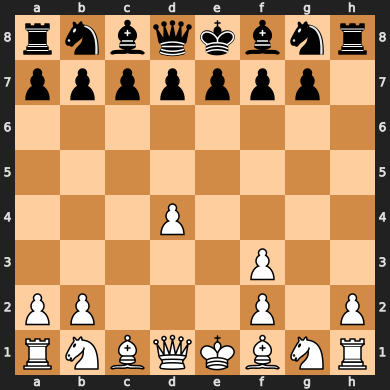

In [10]:
import chess.engine
engine = chess.engine.SimpleEngine.popen_uci("/content/stockfish/stockfish-ubuntu-x86-64-avx2")

board = chess.Board("r1bqkbnr/p1pp1ppp/1pn5/4p3/2B1P3/5Q2/PPPP1PPP/RNB1K1NR w KQkq - 2 4")
board = chess.Board("rnbqkbnr/ppppppp1/8/8/3P4/5P2/PP3P1P/RNBQKBNR w Kkq - 2 4")

def brett_to_string(brett):
    output = ""
    figuren = "0PNBRQKkqrbnp"
    nullen = 0
    for zeile in brett:
        for feld in zeile:
            if feld==0:
                nullen+=1
            elif nullen>0:
                output += str(nullen)
                output += figuren[feld]
                nullen = 0
            else:
                output += figuren[feld]
        if nullen>0:
            output += str(nullen)
            nullen = 0
        output += "/"
    return output[:-1]

schachbrett.male()
for zeile in schachbrett.feld:
    print(zeile)
print(brett_to_string(schachbrett.feld))
info = engine.analyse(board, chess.engine.Limit(depth=20))
print(*info["pv"], sep="\n")
board

In [27]:
from schach_utils import koenig
engine = chess.engine.SimpleEngine.popen_uci("/content/stockfish/stockfish-ubuntu-x86-64-avx2")

schachbrett = Spielfeld()
schachbrett.male()

def ki_zug_stockfish(schachbrett, zug=0):
    schachbrett.invertiere()
    figurenzuordnung = ["", "", "N", "B", "R", "Q", "K"]
    fen_brett = brett_to_string(schachbrett.feld) # "rnbqkbnr/ppppppp1/8/8/3P4/5P2/PP3P1P/RNBQKBNR w Kkq - 2 4"
    fen_brett += " b - - 0 "+str(zug)
    board = chess.Board(fen_brett)
    info = engine.analyse(board, chess.engine.Limit(depth=20))
    zug = str(info["pv"][0])
    von = zug[:2]
    bis = zug[2:]
    zug = figurenzuordnung[abs(schachbrett[von])]+bis
    zug = zug[:-1]+str(9-int(zug[-1]))
    schachbrett.invertiere()
    return zug

num_zug = 1
while True:
    # Zug Weiß
    print(get_alle_bewegungen(schachbrett))
    print(berechne_wert(schachbrett))
    z = input("Weiß gibt einen Zug ein: ")
    while True:
        if zug(schachbrett, z) == None:
            break
        z = input("Weiß gibt einen Zug ein: ")
    schachbrett.male()

    # Zug Schwarz
    schachbrett.invertiere()
    z = ki_zug_stockfish(schachbrett, num_zug)
    zug(schachbrett, z)
    schachbrett.invertiere()
    schachbrett.male()

    # König weg?
    schwarzer_koenig = False
    weisser_koenig = False
    for i in range(8):
        for j in range(8):
            if abs(schachbrett.feld[i][j])==koenig:
                if schachbrett.feld[i][j]>0:
                    weisser_koenig = True
                else:
                    schwarzer_koenig = True
    if weisser_koenig and not schwarzer_koenig:
        print("Weiß hat gewonnen!")
        break
    elif schwarzer_koenig and not weisser_koenig:
        print("Schwarz hat gewonnen!")
        break

    num_zug += 1


♜♞♝♛♚♝♞♜
♟♟♟♟♟♟♟♟
♙♙♙♙♙♙♙♙
♙♙♙♙♙♙♙♙
♙♙♙♙♙♙♙♙
♙♙♙♙♙♙♙♙
♙♙♙♙♙♙♙♙
♖♘♗♕♔♗♘♖

['a3', 'a4', 'b3', 'b4', 'c3', 'c4', 'd3', 'd4', 'e3', 'e4', 'f3', 'f4', 'g3', 'g4', 'h3', 'h4', 'Nc3', 'Na3', 'Nh3', 'Nf3']
0.0
Weiß gibt einen Zug ein: e4
♜♞♝♛♚♝♞♜
♟♟♟♟♟♟♟♟
♙♙♙♙♙♙♙♙
♙♙♙♙♙♙♙♙
♙♙♙♙♙♙♙♙
♙♙♙♙♙♙♙♙
♙♙♙♙♙♙♙♙
♖♘♗♕♔♗♘♖

♜♞♝♛♚♝♞♜
♟♟♙♟♟♟♟♟
♙♙♙♙♙♙♙♙
♙♙♟♙♙♙♙♙
♙♙♙♙♙♙♙♙
♙♙♙♙♙♙♙♙
♙♙♙♙♙♙♙♙
♖♘♗♕♔♗♘♖

['e5', 'a3', 'a4', 'b3', 'b4', 'c3', 'c4', 'd3', 'd4', 'f3', 'f4', 'g3', 'g4', 'h3', 'h4', 'Nc3', 'Na3', 'Qe2', 'Qf3', 'Qg4', 'Qh5', 'Ke2', 'Be2', 'Bd3', 'Bc4', 'Bb5', 'Ba6', 'Nh3', 'Nf3', 'Ne2']
4.0
Weiß gibt einen Zug ein: Nf3
♜♞♝♛♚♝♞♜
♟♟♙♟♟♟♟♟
♙♙♙♙♙♙♙♙
♙♙♟♙♙♙♙♙
♙♙♙♙♙♙♙♙
♙♙♙♙♙♘♙♙
♙♙♙♙♙♙♙♙
♖♘♗♕♔♗♙♖

♜♙♝♛♚♝♞♜
♟♟♙♟♟♟♟♟
♙♙♞♙♙♙♙♙
♙♙♟♙♙♙♙♙
♙♙♙♙♙♙♙♙
♙♙♙♙♙♘♙♙
♙♙♙♙♙♙♙♙
♖♘♗♕♔♗♙♖

['e5', 'Ng5', 'Ne5', 'Nh4', 'Ng1', 'Nd4', 'a3', 'a4', 'b3', 'b4', 'c3', 'c4', 'd3', 'd4', 'g3', 'g4', 'h3', 'h4', 'Nc3', 'Na3', 'Qe2', 'Ke2', 'Be2', 'Bd3', 'Bc4', 'Bb5', 'Ba6', 'Rg1']
1.0
Weiß gibt einen Zug ein: d4
♜♙♝♛♚♝♞♜
♟♟♙♟♟♟♟♟
♙♙♞♙♙♙♙♙
♙♙♟♙♙♙

KeyboardInterrupt: Interrupted by user

In [ ]:
!wget https://raw.githubusercontent.com/prateeksan/chesspi/development/sample_data/Kasparov.pgn -O "Kasparov.txt"

In [ ]:
with open("Kasparov.txt", "rb") as file:
    zeilen = file.readlines()


In [ ]:
spiele = ("\n".join([z.decode('ascii').strip() for z in zeilen[:34000]])).split("\n\n")[1::2]
print(len(spiele))


In [ ]:
print(spiele[0])

In [ ]:
spielliste = []

for spiel in spiele:
    spiel = spiel.replace("\n", " ")
    spiel_ohne_ergebnis = spiel.split("  ")[0]+"  "
    zugliste = [z.split(" ")[:2] for z in spiel_ohne_ergebnis.split(".")[1:]]
    spielliste.append(zugliste)

In [ ]:
print(*spielliste[0], sep="\n")

In [ ]:
from random import randint

bauer = 1 # 1
springer = 2 # 3
laeufer = 3 # 3
turm = 4 # 5
dame = 5 # 9
koenig = 6 # 1000
leer = 0
figuren = ["\u2659", "\u2659","\u2658","\u2657","\u2656","\u2655","\u2654","\u265A","\u265B","\u265C","\u265D","\u265E","\u265F"]
wertigkeit = [0, 1, 3, 3, 5, 9, 1000]

def flip_pos(pos):
    """
    Funktion, die das Brett dreht.
    Args:
        pos: Position des Feldes
    Returns:
        Position des Feldes nach Drehung

    Beispiel:
        "D4" wird zu "D5"
        "D5" wird zu "D4"
    """
    # Rxc7+  -> rest = Rx, pos = c7 -> Rxc2
    # g8=Q
    if pos[:3]=="O-O": return pos
    rest = ""
    ende = ""
    pos = pos.replace("+", "")
    if "=" in pos:
        ende = pos[-2:]
        pos = pos[:-2]
    if len(pos)>2:
        rest = pos[:-2]
        pos = pos[-2:]
    pos = pos[0]+str(9-int(pos[1]))
    return rest+pos+ende

def get_index(pos):
    """
    Funktion, die eine Position in Koordinaten übersetzt.
    Args:
        pos: Position des Feldes
    Returns:
        Liste [Zeile, Spalte]
    Beispiel:
        "D4" wird zu [3,4]
    """
    pos = pos.upper()[-2:]
    assert pos[0] in "ABCDEFGH" and pos[1] in "12345678", pos+" ist keine gültige Position."

    counter = 0
    for buchstabe in "ABCDEFGH":
        if buchstabe==pos[0]:
            break
        counter += 1

    liste = [8-int(pos[1]), counter]
    return liste

class Spielfeld():
    """
    Klasse, die das Spielbrett repräsentiert.
    """
    def __init__(self):
        """
        Konstruktor, der das Spielbrett erstellt.
        """
        #self.feld = None
        self.reset()

    def reset(self):
        """
        Setzt das Spielfeld auf Anfang zurück.
        """
        self.feld = [
            [-turm, -springer, -laeufer, -dame, -koenig, -laeufer, -springer, -turm],
            [-bauer, -bauer, -bauer, -bauer, -bauer, -bauer, -bauer, -bauer],
            [leer, leer, leer, leer, leer, leer, leer, leer],
            [leer, leer, leer, leer, leer, leer, leer, leer],
            [leer, leer, leer, leer, leer, leer, leer, leer],
            [leer, leer, leer, leer, leer, leer, leer, leer],
            [bauer, bauer, bauer, bauer, bauer, bauer, bauer, bauer],
            [turm, springer, laeufer, dame, koenig, laeufer, springer, turm]
        ]

    def male(self):
        """
        Gibt das Spielfeld auf der Konsole aus.
        """
        output = ''
        bg = ["\x1b[47m", "\x1b[107m"]
        leer_farbe = ["\x1b[37m", "\x1b[97m"]
        counter = 0
        for reihe in self.feld:
            counter += 1
            for feld in reihe:
                if feld == 0:
                    output += bg[counter%2]+leer_farbe[counter%2]+figuren[feld]
                else:
                    output += bg[counter%2]+"\x1b[30m"+figuren[feld]
                counter += 1
            output += '\n'
        output += "\x1b[0m"
        print(output)

    def __getitem__(self, pos):
        """
        Gibt an, was auf einem Feld steht.
        Args:
            pos: Position des Feldes
        Returns:
            Figurenwert
        Beispiel:
            "D2" wird zu 1
        """
        liste = get_index(pos)
        return self.feld[liste[0]][liste[1]]

    def __setitem__(self, pos, value):
        """
        Setzt das Feld auf einen neuen Wert.
        Args:
            pos: Position des Feldes
            value: neuer Wert
        """
        liste = get_index(pos)
        self.feld[liste[0]][liste[1]] = value

    def flip(self):
        """
        Flippt das Spielfeld.
        """
        self.feld = self.feld[::-1]

    def invertiere(self):
        """
        Invertiert das Spielfeld.
        """
        self.flip()
        for i in range(8):
            for j in range(8):
                self.feld[i][j] = -self.feld[i][j]

def links(pos):
    """
    Bewegt nach links.
    Args:
        pos: Position des Feldes
    Returns:
        Position des Feldes nach links
    Beispiel:
        "D2" wird zu "C2"
    """
    if not pos:
        return False
    zeile = pos[1]
    spalte = pos[0]
    spalte_neu = ord(spalte.upper())-1
    if spalte_neu>=65:
        return chr(spalte_neu)+zeile
    else:
        return False

def rechts(pos):
    """
    Bewegt nach rechts.
    Args:
        pos: Position des Feldes
    Returns:
        Position des Feldes nach rechts
    Beispiel:
        "D2" wird zu "E2"
    """
    if not pos:
        return False
    zeile = pos[1]
    spalte = pos[0]
    spalte_neu = ord(spalte)+1
    if spalte_neu<=72:
        return chr(spalte_neu)+zeile
    else:
        return False

def vor(pos):
    """
    Bewegt nach vorne.
    Args:
        pos: Position des Feldes
    Returns:
        Position des Feldes nach vorne
    Beispiel:
        "D2" wird zu "D3"
    """
    if not pos:
        return False
    zeile = pos[1]
    spalte = pos[0]
    zeile_neu = int(pos[1])+1
    if zeile_neu<=8:
        return spalte+str(zeile_neu)
    else:
        return False

def zurueck(pos):
    """
    Bewegt nach hinten.
    Args:
        pos: Position des Feldes
    Returns:
        Position des Feldes nach hinten
    Beispiel:
        "D2" wird zu "D1"
    """
    if not pos:
        return False
    zeile = pos[1]
    spalte = pos[0]
    zeile_neu = int(pos[1])-1
    if zeile_neu>=1:
        return spalte+str(zeile_neu)
    else:
        return False

def bewege_bauer(schachbrett, pos, pos_neu=None):
    """
    Bewegt einen Bauern auf bestimmter Position zu neuer Position.
    Args:
        pos: Position des Feldes
        pos_neu: Position des Feldes nach dem Zug

    """
    assert abs(schachbrett[pos])==bauer, "Hier steht kein Bauer."

    schachbrett[pos] = leer
    if pos_neu is None:
        pos_neu = get_bewegung_bauer(schachbrett, pos)
        pos_neu = pos_neu[randint(0,len(pos_neu)-1)]

    if pos_neu[-1]=="8":
        schachbrett[pos_neu] = dame
    elif "8=" in pos_neu:
        print(pos_neu)
        schachbrett[pos_neu] = {"r": turm, "q": dame, "b": laeufer, "n": springer}[pos_neu.split("=")[1][0].lower()]
    else:
        schachbrett[pos_neu] = bauer

def bewege_springer(schachbrett, pos, pos_neu=None):
    """
    Bewegt einen Springer auf bestimmter Position zu neuer Position.
    Args:
        pos: Position des Feldes
        pos_neu: Position des Feldes nach dem Zug
    """
    assert abs(schachbrett[pos])==springer, "Hier steht kein Springer."

    schachbrett[pos] = leer
    if pos_neu is None:
        pos_neu = get_bewegung_springer(schachbrett, pos)
        pos_neu = pos_neu[randint(0,len(pos_neu)-1)]
    schachbrett[pos_neu] = springer

def bewege_turm(schachbrett, pos, pos_neu=None):
    # Checkliste: Ist da Bauer? Kann er sich bewegen?
    assert abs(schachbrett[pos])==turm, "Hier steht kein Turm."

    schachbrett[pos] = leer
    if pos_neu is None:
        pos_neu = get_bewegung_turm(schachbrett, pos)
        pos_neu = pos_neu[randint(0,len(pos_neu)-1)]
    schachbrett[pos_neu] = turm

def bewege_laeufer(schachbrett, pos, pos_neu=None):
    # Checkliste: Ist da Bauer? Kann er sich bewegen?
    assert abs(schachbrett[pos])==laeufer, "Hier steht kein Läufer."

    schachbrett[pos] = leer
    if pos_neu is None:
        pos_neu = get_bewegung_laeufer(schachbrett, pos)
        pos_neu = pos_neu[randint(0,len(pos_neu)-1)]
    schachbrett[pos_neu] = laeufer

def bewege_dame(schachbrett, pos, pos_neu=None):
    # Checkliste: Ist da Bauer? Kann er sich bewegen?
    assert abs(schachbrett[pos])==dame, "Hier steht keine Dame."

    schachbrett[pos] = leer
    if pos_neu is None:
        pos_neu = get_bewegung_dame(schachbrett, pos)
        pos_neu = pos_neu[randint(0,len(pos_neu)-1)]
    schachbrett[pos_neu] = dame

def bewege_koenig(schachbrett, pos, pos_neu=None):
    # Checkliste: Ist da Bauer? Kann er sich bewegen?
    assert abs(schachbrett[pos])==koenig, "Hier steht kein König."

    schachbrett[pos] = leer
    if pos_neu is None:
        pos_neu = get_bewegung_koenig(schachbrett, pos)
        pos_neu = pos_neu[randint(0,len(pos_neu)-1)]
    schachbrett[pos_neu] = koenig

def get_bewegung_dame(schachbrett, pos):
    return get_bewegung_laeufer(schachbrett, pos)+get_bewegung_turm(schachbrett, pos)

def get_bewegung_koenig(schachbrett, pos):
    output = []
    figur = schachbrett[pos]
    # Springe 1 nach vorne
    pos_neu = vor(pos)
    if pos_neu and (schachbrett[pos_neu]==leer or figur*schachbrett[pos_neu]<0):
        output.append(pos_neu)
    # Springe 1 nach vorne rechts
    pos_neu = vor(rechts(pos))
    if pos_neu and (schachbrett[pos_neu]==leer or figur*schachbrett[pos_neu]<0):
        output.append(pos_neu)
    # Springe 1 nach vorne links
    pos_neu = vor(links(pos))
    if pos_neu and (schachbrett[pos_neu]==leer or figur*schachbrett[pos_neu]<0):
        output.append(pos_neu)
    # Springe 1 nach rechts
    pos_neu = rechts(pos)
    if pos_neu and (schachbrett[pos_neu]==leer or figur*schachbrett[pos_neu]<0):
        output.append(pos_neu)
    # Springe 1 nach hinten rechts
    pos_neu = rechts(zurueck(pos))
    if pos_neu and (schachbrett[pos_neu]==leer or figur*schachbrett[pos_neu]<0):
        output.append(pos_neu)
    # Springe 1 nach hinten
    pos_neu = zurueck(pos)
    if pos_neu and (schachbrett[pos_neu]==leer or figur*schachbrett[pos_neu]<0):
        output.append(pos_neu)
    # Springe 1 nach hinten links
    pos_neu = zurueck(links(pos))
    if pos_neu and (schachbrett[pos_neu]==leer or figur*schachbrett[pos_neu]<0):
        output.append(pos_neu)
    # Springe 1 nach links
    pos_neu = links(pos)
    if pos_neu and (schachbrett[pos_neu]==leer or figur*schachbrett[pos_neu]<0):
        output.append(pos_neu)

    # TODO: Rochade
    return output

def get_bewegung_bauer(schachbrett, pos):
    output = []
    figur = schachbrett[pos]
    # Springe 1 nach vorne
    pos_neu = vor(pos)
    if schachbrett[pos_neu]==leer and pos_neu:
        output.append(pos_neu)
        if pos_neu[1]=="8":
            output.extend([pos_neu+"=R", pos_neu+"=N", pos_neu+"=B", pos_neu+"=Q"])
    # Springe 2 nach vorne, falls du dich noch nicht bewegt hast
    pos_neu = vor(vor(pos))
    if pos[1]=="2" and len(output)==1 and schachbrett[pos_neu]==leer:
        output.append(pos_neu)
    # Springe 1 diagonal nach vorne, falls da ein Gegner sitzt
    # Oben rechts von B2 ist C3
    pos_neu = rechts(vor(pos))
    if pos_neu and figur*schachbrett[pos_neu]<0:
        # "Bauer von c schlägt Figure auf d4": "d4" -> "cxd4"
        pos_neu = pos[0]+"x"+pos_neu
        output.append(pos_neu)
        if pos_neu[1]=="8":
            output.extend([pos_neu+"=R", pos_neu+"=N", pos_neu+"=B", pos_neu+"=Q"])
    pos_neu = links(vor(pos))
    if pos_neu and figur*schachbrett[pos_neu]<0:
        pos_neu = pos[0]+"x"+pos_neu
        output.append(pos_neu)
        if pos_neu[1]=="8":
            output.extend([pos_neu+"=R", pos_neu+"=N", pos_neu+"=B", pos_neu+"=Q"])

    # TODO: En Passant
    return output

def get_bewegung_turm(schachbrett, pos):
    output = []
    figur = schachbrett[pos]
    # vor
    pos_neu = vor(pos)
    while pos_neu and (schachbrett[pos_neu]==leer or figur*schachbrett[pos_neu]<0):
        output.append(pos_neu)
        if figur*schachbrett[pos_neu]<0:
            break
        pos_neu = vor(pos_neu)

    # links
    pos_neu = links(pos)
    while pos_neu and (schachbrett[pos_neu]==leer or figur*schachbrett[pos_neu]<0):
        output.append(pos_neu)
        if figur*schachbrett[pos_neu]<0:
            break
        pos_neu = links(pos_neu)

    # rechts
    pos_neu = rechts(pos)
    while pos_neu and ((schachbrett[pos_neu]==leer or figur*schachbrett[pos_neu]<0)):
        output.append(pos_neu)
        if figur*schachbrett[pos_neu]<0:
            break
        pos_neu = rechts(pos_neu)

    # zurueck
    pos_neu = zurueck(pos)
    while pos_neu and ((schachbrett[pos_neu]==leer or figur*schachbrett[pos_neu]<0)):
        output.append(pos_neu)
        if figur*schachbrett[pos_neu]<0:
            break
        pos_neu = zurueck(pos_neu)

    # TODO: Rochade
    return output

def get_bewegung_laeufer(schachbrett, pos):
    output = []
    figur = schachbrett[pos]
    # diagonal rechts vor
    pos_neu = rechts(vor(pos))
    while pos_neu and (schachbrett[pos_neu]==leer or figur*schachbrett[pos_neu]<0):
        #print("diagonal rechts vor", pos_neu)
        output.append(pos_neu)
        if figur*schachbrett[pos_neu]<0:
            break
        pos_neu = rechts(vor(pos_neu))

    # diagonal links vor
    pos_neu = vor(links(pos))
    while pos_neu and (schachbrett[pos_neu]==leer or figur*schachbrett[pos_neu]<0):
        #print("diagonal links vor",pos_neu)
        output.append(pos_neu)
        if figur*schachbrett[pos_neu]<0:
            break
        pos_neu = vor(links(pos_neu))

    # diagonal links zurück
    pos_neu = links(zurueck(pos))
    while pos_neu and ((schachbrett[pos_neu]==leer or figur*schachbrett[pos_neu]<0)):
        #print("diagonal links zurück",pos_neu)
        output.append(pos_neu)
        if figur*schachbrett[pos_neu]<0:
            break
        pos_neu = links(zurueck(pos_neu))

    # diagonal rechts zurück
    pos_neu = rechts(zurueck(pos))
    while pos_neu and ((schachbrett[pos_neu]==leer or figur*schachbrett[pos_neu]<0)):
        #print("diagonal rechts zurück",pos_neu)
        output.append(pos_neu)
        if figur*schachbrett[pos_neu]<0:
            break
        pos_neu = rechts(zurueck(pos_neu))

    return output

def get_bewegung_springer(schachbrett, pos):
    output = []
    figur = schachbrett[pos]
    pos_neu = rechts(vor(vor(pos)))
    if pos_neu and (schachbrett[pos_neu]==leer or figur*schachbrett[pos_neu]<0):
        output.append(pos_neu)
    pos_neu = links(vor(vor(pos)))
    if pos_neu and (schachbrett[pos_neu]==leer or figur*schachbrett[pos_neu]<0):
        output.append(pos_neu)
    pos_neu = rechts(rechts(vor(pos)))
    if pos_neu and (schachbrett[pos_neu]==leer or figur*schachbrett[pos_neu]<0):
        output.append(pos_neu)
    pos_neu = rechts(rechts(zurueck(pos)))
    if pos_neu and (schachbrett[pos_neu]==leer or figur*schachbrett[pos_neu]<0):
        output.append(pos_neu)
    pos_neu = rechts(zurueck(zurueck(pos)))
    if pos_neu and (schachbrett[pos_neu]==leer or figur*schachbrett[pos_neu]<0):
        output.append(pos_neu)
    pos_neu = links(zurueck(zurueck(pos)))
    if pos_neu and (schachbrett[pos_neu]==leer or figur*schachbrett[pos_neu]<0):
        output.append(pos_neu)
    pos_neu = links(links(zurueck(pos)))
    if pos_neu and (schachbrett[pos_neu]==leer or figur*schachbrett[pos_neu]<0):
        output.append(pos_neu)
    pos_neu = links(links(vor(pos)))
    if pos_neu and (schachbrett[pos_neu]==leer or figur*schachbrett[pos_neu]<0):
        output.append(pos_neu)
    return output

def rochade(schachbrett, z):
    """
    Macht eine Rochade.
    Args:
        schachbrett: Spielfeld
        z: Richtung
    """
    # O-O-O
    # O-O
    if z=="O-O": # Kurze Rochade
        bewege_koenig(schachbrett, "E1", "G1")
        bewege_turm(schachbrett, "H1", "F1")
    elif z=="O-O-O": # Lange Rochade
        bewege_koenig(schachbrett, "E1", "C1")
        bewege_turm(schachbrett, "A1", "D1")

def get_alle_bewegungen(schachbrett):
    """
    Funktion, die alle Bewegungen bestimmt.
    Args:
        schachbrett: Spielfeld
    """
    bewegungsfunc = [
            lambda x: [z.lower() for z in get_bewegung_bauer(schachbrett,x)],
            lambda x: ["N" + z.lower() for z in get_bewegung_springer(schachbrett,x)],
            lambda x: ["B" + z.lower() for z in get_bewegung_laeufer(schachbrett,x)],
            lambda x: ["R" + z.lower() for z in get_bewegung_turm(schachbrett,x)],
            lambda x: ["Q" + z.lower() for z in get_bewegung_dame(schachbrett,x)],
            lambda x: ["K" + z.lower() for z in get_bewegung_koenig(schachbrett,x)]
        ]
    output = []
    for i in range(8):
        for j in range(8):
            figur = schachbrett.feld[i][j]
            if figur>0:
                output.extend(bewegungsfunc[figur-1]("ABCDEFGH"[j]+str(8-i)))
    return output

def zug(schachbrett, z):
    #print(z)
    if z[0]=="O":
        return rochade(schachbrett, z)
    if z[0].upper()!=z[0]:
        figur = bauer
        pos_neu = z.upper().replace("X", "x")
        get_bewegung = get_bewegung_bauer
        bewege = bewege_bauer
    elif z[0]=="K":
        figur = koenig
        pos_neu = z.upper()[-2:]
        get_bewegung = get_bewegung_koenig
        bewege = bewege_koenig
    elif z[0]=="N":
        figur = springer
        pos_neu = z.upper()[-2:]
        get_bewegung = get_bewegung_springer
        bewege = bewege_springer
    elif z[0]=="R":
        figur = turm
        pos_neu = z.upper()[-2:]
        get_bewegung = get_bewegung_turm
        bewege = bewege_turm
    elif z[0]=="B":
        figur = laeufer
        pos_neu = z.upper()[-2:]
        get_bewegung = get_bewegung_laeufer
        bewege = bewege_laeufer
    elif z[0]=="Q":
        figur = dame
        pos_neu = z.upper()[-2:]
        get_bewegung = get_bewegung_dame
        bewege = bewege_dame

    for i in range(8):
        for j in range(8):
            if schachbrett.feld[i][j]==figur:
                b = get_bewegung(schachbrett, "ABCDEFGH"[j]+str(8-i))#, "ABCDEFGH"[j]+str(8-i)
                if pos_neu in b:
                    return bewege(schachbrett, "ABCDEFGH"[j]+str(8-i), pos_neu)
    print("Ungültiger Zug.")
    return False

def berechne_wert(schachbrett):
    # https://chessify.me/blog/chess-engine-evaluation
    # 1. Zähle Figuren mit Wertungen
    # 2. Positionswertungen
    # 2.1 Bedrohte Figuren
    # 2.2 König steht rochiert,...
    # Freibauer
    # Backward Pawn
    # Passed Pawn
    wertung = 0

    summe_w = 0
    summe_s = 0
    doppelt_w = 0
    doppelt_s = 0
    w_liste = [0]
    s_liste = [0]
    for spalte in range(8):
        w = 0
        s = 0
        for zeile in range(8):
            # Wertigkeit
            if schachbrett.feld[zeile][spalte]>0:
                summe_w += wertigkeit[abs(schachbrett.feld[zeile][spalte])]
            if schachbrett.feld[zeile][spalte]<0:
                summe_s += wertigkeit[abs(schachbrett.feld[zeile][spalte])]

            # Anzahl gedoppelter Bauern und isolierter Bauern
            if schachbrett.feld[zeile][spalte]==1:
                w += 1
            if schachbrett.feld[zeile][spalte]==-1:
                s += 1

        if w>0:
            doppelt_w += w-1
        if s>0:
            doppelt_s += s-1
        w_liste.append(w)
        s_liste.append(s)
    w_liste.append(0)
    s_liste.append(0)
    w = 0
    s = 0
    for i in range(1, len(w_liste)-1):
        if w_liste[i-1]==0 and w_liste[i+1]==0:
            w += w_liste[i]
        if s_liste[i-1]==0 and s_liste[i+1]==0:
            s += s_liste[i]
    wertung = summe_w-summe_s - 0.1*(doppelt_w-doppelt_s) + 0.1*(s-w)

    # Anzahl möglicher Züge, "Mobilität"
    zuege_w = len(get_alle_bewegungen(schachbrett))
    schachbrett.invertiere()
    zuege_s = len(get_alle_bewegungen(schachbrett))
    schachbrett.invertiere()
    wertung += 0.5*(zuege_w-zuege_s)

    return wertung

def berechne_wert(schachbrett):
    # https://chessify.me/blog/chess-engine-evaluation
    # 1. Zähle Figuren mit Wertungen
    # 2. Positionswertungen
    # 2.1 Bedrohte Figuren
    # 2.2 König steht rochiert,...
    # Freibauer
    # Backward Pawn
    # Passed Pawn
    wertung = 0

    summe_w = 0
    summe_s = 0
    doppelt_w = 0
    doppelt_s = 0
    w_liste = [0]
    s_liste = [0]
    for spalte in range(8):
        w = 0
        s = 0
        for zeile in range(8):
            # Wertigkeit
            if schachbrett.feld[zeile][spalte]>0:
                summe_w += wertigkeit[abs(schachbrett.feld[zeile][spalte])]
            if schachbrett.feld[zeile][spalte]<0:
                summe_s += wertigkeit[abs(schachbrett.feld[zeile][spalte])]

            # Anzahl gedoppelter Bauern und isolierter Bauern
            if schachbrett.feld[zeile][spalte]==1:
                w += 1
            if schachbrett.feld[zeile][spalte]==-1:
                s += 1

        if w>0:
            doppelt_w += w-1
        if s>0:
            doppelt_s += s-1
        w_liste.append(w)
        s_liste.append(s)
    w_liste.append(0)
    s_liste.append(0)
    w = 0
    s = 0
    for i in range(1, len(w_liste)-1):
        if w_liste[i-1]==0 and w_liste[i+1]==0:
            w += w_liste[i]
        if s_liste[i-1]==0 and s_liste[i+1]==0:
            s += s_liste[i]
    wertung = summe_w-summe_s - 0.1*(doppelt_w-doppelt_s) + 0.1*(s-w)

    # Anzahl möglicher Züge, "Mobilität"
    zuege_w = len(get_alle_bewegungen(schachbrett))
    schachbrett.invertiere()
    zuege_s = len(get_alle_bewegungen(schachbrett))
    schachbrett.invertiere()
    wertung += 0.5*(zuege_w-zuege_s)

    return wertung


In [ ]:
#from schach_utils import zug, flip_pos
spiel = spielliste[0]

schachbrett = Spielfeld()
#schachbrett.male()

n_zuege = 11
for i in range(len(spiel)):
    z = spiel[i]
    print(i, z)
    zug(schachbrett, z[0])
    schachbrett.invertiere()
    schw = z[1]
    zug(schachbrett, flip_pos(schw))
    schachbrett.invertiere()
    schachbrett.male()
print(spiel[n_zuege+1])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

feld = np.zeros([8,8])
pos = get_index("B1")
feld[pos[0], pos[1]] += 1
pos = get_index("G1")
feld[pos[0], pos[1]] += 1
pos = get_index("B8")
feld[pos[0], pos[1]] += 1
pos = get_index("G8")
feld[pos[0], pos[1]] += 1

print(feld)
for zugliste in spielliste:
    for zug in zugliste:
        for z in zug:
            z = z.replace("+", "")
            if len(z)>0 and z[0]=="K":
                pos = get_index(z[-2:])
                feld[pos[0], pos[1]] += 1

plt.figure()
plt.imshow(feld)
plt.colorbar()
plt.show()
